<a href="https://colab.research.google.com/github/imymemineyay/Study_Python/blob/main/Python_dojang(Unit40_43).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unit 40. 제너레이터 사용하기**

제너레이터(발생자) : 이터레이터를 생성해주는 함수

- 이터레이터 : 클래스에 __iter__, __next__ 또는 __getitem__메서드를 구현
- 제너레이터 : 함수 안에 yield라는 키워드만 사용하면 됨

40.1 제너레이터와 yield 알아보기

함수 안에 yield를 사용하면 함수는 제너레이터가 되면 yield에는 값(변수)를 지정

        yield 값

In [ ]:
def number_generator():
  yield 0
  yield 1
  yield 2

for i in number_generator():
  print(i)

0
1
2


- number_generator 함수를 호출하면 제너레이터 객체가 반환
- 이 객체를 dir함수로 살펴보면 이터레이터에서 볼 수 있는 __iter__, __next__ 메서드 포함

In [ ]:
g = number_generator()
print(g)
print(dir(g))

<generator object number_generator at 0x7f91f91cd0b0>
['__class__', '__del__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__name__', '__ne__', '__new__', '__next__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'close', 'gi_code', 'gi_frame', 'gi_running', 'gi_yieldfrom', 'send', 'throw']


In [ ]:
print(g.__next__())
print(g.__next__())
print(g.__next__())
print(g.__next__())
print(g.__next__())


0
1
2


StopIteration: ignored

📢📢 

이터레이터는 __next__ 메서드 안에서 직접 return으로 값을 반환했지만 제너레이터는 yield에 지정한 값이 __next__메서드의 반환값으로 나옴

또한, 이터레이터는 raise로 StopIteration 예외를 직접 발생시켰지만 제너레이터는 함수의 끝까지 도달하면 StopIteration 예외가 자동으로 발생함

제너레이터는 제너레이터 객체에서 __next__ 메서드를 호출할 때마다 함수 안의 yield까지 코드를 실행하며 yield에서 값을 발생시킴. 그래서 이름이 generator 임


- for와 제너레이터

for 반복문은 반복할 때마다 __next__ 를 호출하므로 yield에서 발생시킨 값을 가져옴. 

그리고 StopIteration 예외가 발생하면 반복을 끝냄

제너레이터 함수 호출 → 제너레이터 객체 → __iter__ 는 self 반환 → 제너레이터 객체

yield를 사용하면 값을 함수 바깥으로 전달하면서 코드 실행을 함수 바깥에 양보함

yield는 현재 함수를 잠시 중단하고 함수 바깥의 코드가 실행되도록 만듦

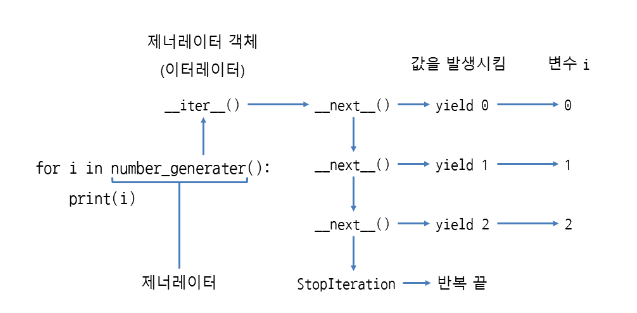

- yield의 동작 과정 알아보기

      변수 = next(제너레이터객체)

In [ ]:
def number_generator():
  yield 0
  yield 1
  yield 2

g = number_generator()
a = next(g) # yield를 사용하여 함수 바깥으로 전달한 값은 next의 반환값으로 나옴
print(a)

b = next(g)
print(b)

c = next(g)
print(c) 

0
1
2


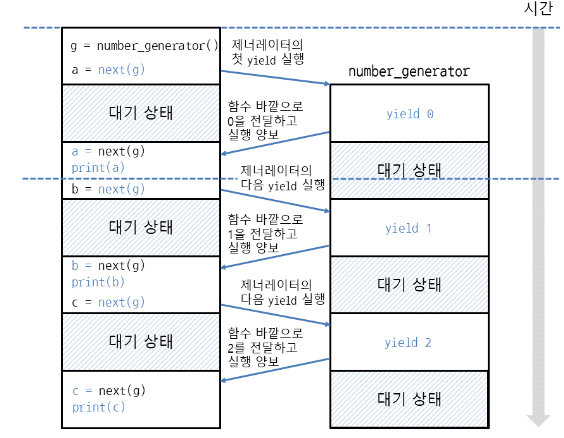

🎯🎯

제너레이터는 함수를 끝내지 않은 상태에서 yield를 사용하여 값을 바깥으로 전달 가능

즉, return은 반환 즉시 함수가 끝나지만 yield는 잠시 함수 바깥의 코드가 실행되도록 양보하여 값을 가져가게 한 뒤 다시 제너레이터 안의 코드를 계속 실행하는 방식

<참고>

제너레이터는 함수 끝까지 도달하면 StopIteration 예외가 발생

제너레이터 안에서 return에 반환값을 저장하면 StopIteration 예외의 에러 메세지로 들어감

In [ ]:
def one_generator():
  yield 1
  return 'return에 지정한 값'

try:
  g = one_generator()
  next(g)
  next(g)
except StopIteration as e:
  print(e)

return에 지정한 값


40.2 제너레이터 만들기

In [ ]:
# range처럼 동작하는 제너레이터 생성

def number_generator(stop):
  n = 0
  while n < stop:
    yield n
    n += 1

for i in number_generator(3):
  print(i)

0
1
2


In [ ]:
g = number_generator(3)

print(next(g))

print(next(g))

print(next(g))

print(next(g))


0
1
2


StopIteration: ignored

yield에서 함수를 호출하면 해당 함수의 반환값을 바깥으로 전달

즉, yield에 무엇을 지정하든 결과만 바깥으로 전달(함수의 반환값, 식의 결과)

In [ ]:
def upper_generator(x):
  for i in x :
    yield i.upper()

fruits = ['apple','orange','pineapple','melon','strawberry']

for i in upper_generator(fruits):
  print(i)

APPLE
ORANGE
PINEAPPLE
MELON
STRAWBERRY


40.3 yield from 으로 값을 여러 번 바깥으로 전달하기

In [ ]:
# 리스트의 1, 2, 3을 바깥으로 전달

def number_generator():
  x = [1,2,3]
  for i in x:
    yield i

for i in number_generator():
  print(i)

1
2
3


          yield from 반복가능한객체
          yield from 이터레이터
          yield from 제너레이터객체

In [ ]:
def number_generator():
  x = [1, 2, 3]
  yield from x # 리스트에 들어있는 요소를 한 개씩 바깥으로 전달

for i in number_generator():
  print(i)

1
2
3


In [ ]:
g = number_generator()
print(next(g))
print(next(g))
print(next(g))
print(next(g))


1
2
3


StopIteration: ignored

In [ ]:
def number_generator(stop):
  n = 0
  while n < stop :
    yield n 
    n += 1

def three_generator():
  yield from number_generator(3) # 제너레이터 객체 지정

for i in three_generator():
  print(i)

0
1
2


<참고>

제너레이터 표현식

리스트 표현식을 사용할 때 [ ] (대괄호)를 사용

같은 리스트 표현식을 ( ) (괄호)로 묶으면 제너레이터 표현식이 됨

        (식 for 변수 in 반복가능한객체)

In [ ]:
[i for i in range(50) if i % 2 ==0 ]


[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48]

In [ ]:
(i for i in range(50) if i % 2 == 0 )

<generator object <genexpr> at 0x7f91efa166d0>

In [ ]:
with open('words.txt','w') as file:
  file.write('compatibility\n')
  file.write('experience\n')
  file.write('photography\n')
  file.write('spotlight\n')

In [ ]:
with open('words.txt') as file:
  line = file.readline()
line

'compatibility\n'

In [ ]:
with open('words.txt') as file:
  line = file.readlines()
line

['compatibility\n', 'experience\n', 'photography\n', 'spotlight\n']

In [ ]:
def file_read():
  with open('words.txt') as file:
    while True:
      line = file.readline()
      if line == '':
        break
      yield line.strip('\n')

for i in file_read():
  print(i)

compatibility
experience
photography
spotlight


In [ ]:
def file_read():
  with open('words.txt') as file:
    line = file.readlines()
    yield from line

for i in file_read():
  print(i, end ='')

compatibility
experience
photography
spotlight


연습문제)

표준 입력으로 정수 두 개가 입력됩니다(첫 번째 입력 값의 범위는 10-1000, 두 번째 입력 값의 범위는 100-1000이며 첫 번째 입력 값은 두 번째 입력 값보다 항상 작습니다). 다음 소스 코드에서 첫 번째 정수부터 두 번째 정수 사이의 소수(prime number)를 생성하는 제너레이터를 만드세요. 소수는 1과 자기자신만으로 나누어 떨어지는 1보다 큰 양의 정수입니다.

In [ ]:
def prime_number_generator(start,stop):
  for n in range(start,stop):
    is_prime = True
    for k in range(2,n-1):
      if n % k == 0 :
        is_prime = False
    if is_prime ==True:
      yield n


start, stop = map(int, input().split())
 
g = prime_number_generator(start, stop)
print(type(g))
for i in g:
    print(i, end=' ')

950 1000
<class 'generator'>
953 967 971 977 983 991 997 

## **Unit 41. 코루틴 사용하기**



In [ ]:
def add(a,b):
  c = a + b
  print(c)
  print('add 함수')

def calc():
  add(1,2)
  print('calc 함수')

calc()

3
add 함수
calc 함수


위 소스 코드에서 

calc : 메인 루틴

add : calc의 서브 루틴

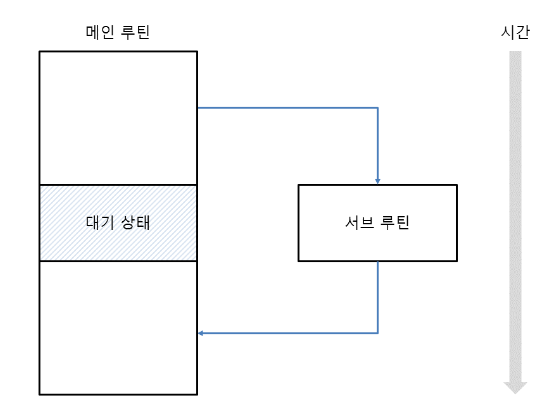

메인 루틴에서 서브 루틴을 호출하면 서브 루틴의  코드를 실행한 뒤 다시 메인 루틴으로 돌아옴

특히 서브 루틴이 끝나면 서브 루틴의 내용은 모두 사라짐

즉, 서브 루틴은 메인 루틴에 종속된 관계

HOWEVER,

코루틴은 서로 협력하는 루틴을 뜻하며

메인 루틴과 서브 루틴처럼 종속된 관계가 아니라 서로 대등한 관계이며 특정 시점에 상대방의 코드를 실행함

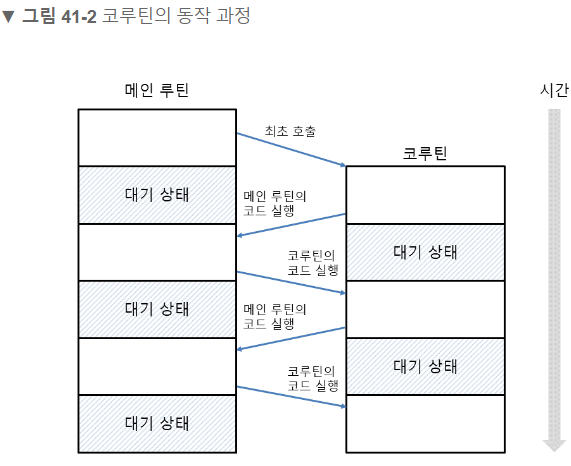

코루틴은 함수가 종료되지 않은 상태에서 메인 루틴의 코드를 실행한 뒤 다시 돌아와서 코루틴의 코드를 실행함

즉, 코루틴이 종료되지 않았으므로 코루틴의 내용도 계속 유지됨

일반 함수를 호출하면 코드를 한 번만 실행할 수 있지만, 코루틴은 코드를 여러번 실행할 수 있음

<참고>

진입점 : 함수의 코드를 실행하는 지점

→ 코루틴은 진입점이 여러 개인 함수

- 코루틴에 값 보내기

제너레이터는 yield로 값을 발생시켰지만 코루틴은 yield로 값을 받아올 수 있음

코루틴에 값을 보내면서 코드를 실행할 때는 send메서드를 사용

send 메서드가 보낸 값을 받아오려면 (yield) 형식으로  yield를 괄호로 묶어준 뒤 변수에 저장

        코루틴객체.send(값)
        변수 = (yield)

In [ ]:
def number_coroutine():
  while True: # 코루틴을 계속 유지하기 위해 무한 루프 사용
    x = (yield) # 코루틴 바깥에서 값을 받아옴, yield를 괄호로 묶어야 함
    print(x)

co = number_coroutine()
next(co) # 코루틴 안의 코드를 최초로 실행하여 yield까지 코드 실행(최초 실행)
         # x = (yield)의 yield에서 대기하고 다시 메인 루틴으로 돌아옴

co.send(1) # 코루틴에 숫자 1을 보냄
co.send(2)
co.send(3)

1
2
3


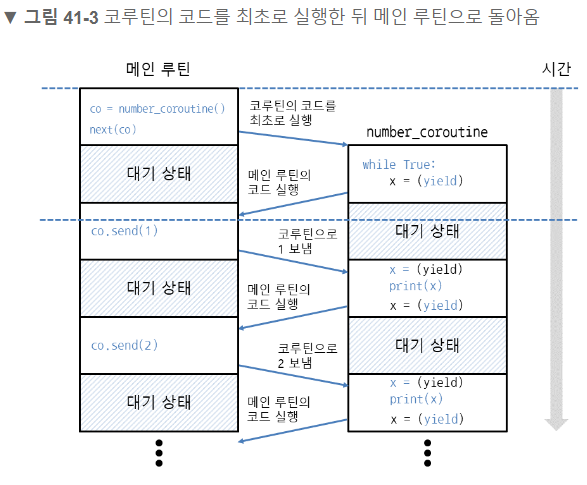

메인 루틴에서 co.send(1)로 1을 보내면 코루틴은 대기상태에서 풀리고 x = (yield)의 x = 부분이 실행된 뒤 print(x)로 숫자를 출력함

이 코루틴은 while True:로 반복하는 구조이므로 다시 x = (yield)의 yield에서 대기

그러고 나서 메인 루틴으로 돌아옴

이런 과정으로 send가 보낸 값을 (yield)가 받게 됨

▶ next 함수 (__next__메서드)로 코루틴의 코드를 최초로 실행하고, send 메서드로 코루틴에 값을 보내면서 대기하고 있던 코루틴의 코드를 다시 실행



<참고>

send로 코루틴의 코드를 최초로 실행하기

코루틴객체.send(None)과 같이 send메서드에 None을 지정해도 코루틴의 코드를 최초로 실행 가능

41.2 코루틴 바깥으로 값 전달하기

        변수 = (yield 변수) → 값 받아온 후 값 전달
        변수 = next(코루틴객체) → 전달값 ①
        변수 = 코루틴객체.send(값) → ② 의 반환값으로 나옴

In [ ]:
def sum_coroutine():
  total = 0 # 값을 누적할 변수에 0 할당
  while True : 
    x = (yield total) # 값을 받아오면서 바깥으로 값을 전달하도록 만듦
    total += x        # 바깥에서 send가 보낸 값은 x에 저장되고, 코루틴 바깥으로 보낼 값은 total

co = sum_coroutine() # 코루틴 객체를 생성한 뒤
print(next(co)) # 코루틴 안의 코드를 최초로 실행하여 yield까지 코드를 실행하고 print로 
                # 반환된 값 출력

print(co.send(1))  # co.send에서 반환된 값 print함수로 출력
print(co.send(2))
print(co.send(3))


0
1
3
6


next와 send의 차이

- next는 코루틴의 코드를 실행하지만, 값을 보내지 않을 때 사용

- send는 값을 보내면서 코루틴의 코드를 실행할 때 사용

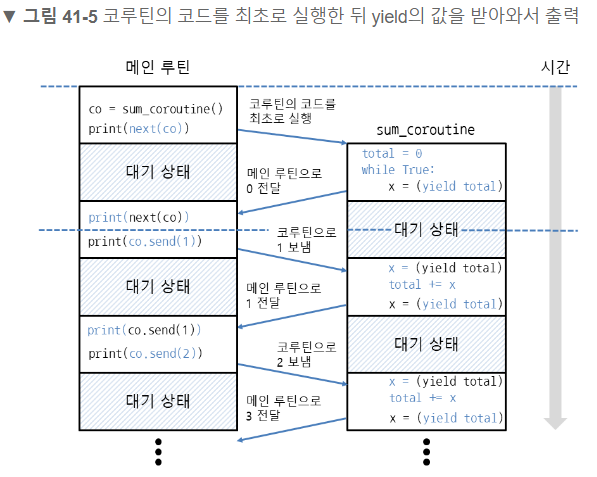

**코루틴의 동작 과정**

next(co)로 코루틴의 코드를 최초로 실행하면 x = (yield total)의 yield에서 total을 메인 루틴으로 전달하고 대기함

그 다음에 메인 루틴에서 print(next(co))와 같이 코루틴에서 나온 값을 출력

total에 0이 들어있으므로 0을 받아와서 출력

그리고 co.send(1)로 1을 보내면 코루틴은 대기 상태에서 풀리고 x = (yield total)의 x = 부분이 실행된 뒤 total += x로 숫자를 누적함

코루틴은 while True:로 반복하는 구조이므로 다시 x = (yield total)의 yield에서 total을 메인 루틴으로 전달하고 대기함

그 다음에 메인 루틴에서 print(co.send(1))과 같이 코루틴에서 나온 값을 출력함

여기서 total에 1이 들어있으므로 1을 받아와서 출력

이런 과정으로 (yield total)이 바깥으로 전달한 값을 next와 send의 반환값으로 받고, send가 보낸 값을 x = (yield total)의 x가 받게 됨



**제너레이터와 코루틴의 차이점**

- 제너레이터는 next함수(__next__메서드)를 반복 호출하여 값을 얻어내는 방식

- 코루틴은 next함수(__next__메서드)를 한 번만 호출한 뒤 send로 값을 주고 받는 방식

<참고>

값을 보내지 않고 코루틴의 코드 실행하기

값을 보내지 않으면서 코루틴의 코드를 실행할 때는 next함수 (__next__ 메서드)만 사용하면 됨.

이 방식이 일반적인 제너레이터

41.3 코루틴을 종료하고 예외 처리하기

코루틴은 실행 상태를 유지하기 위해 while True:를 사용해서 끝나지 않는 무한 루프로 동작 

코루틴을 강제로 종료하고 싶다면 close 메서드 사용

        코루틴객체.close()

In [ ]:
def number_coroutine():
  while True:
    x = (yield)
    print(x, end = ' ')

co = number_coroutine()
next(co)

for i in range(20):
  co.send(i)

co.close() # 코루틴의 종료 시점을 알아야 할 때 사용하면 편리

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

코루틴 객체에서 close 메서드를 호출하면 코루틴이 종료될 때 GeneratorExit 예외가 발생

따라서 이 예외를 처리하면 코루틴의 종료 시점을 알 수 있음

In [ ]:
def number_coroutine():
  try:
    while True:
      x = (yield)
      print(x, end = ' ')
  except GeneratorExit: # 코루틴이 종료 될 때 GeneratorExit 예외 발생
    print()
    print('코루틴 종료')

co = number_coroutine()
next(co)

for i in range(20):
  co.send(i)

co.close()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
코루틴 종료


- 코루틴 안에서 예외 발생시키기

throw 메서드 : 예외를 코루틴 안으로 던짐, 지정한 에러 메세지는 except as 의 변수에 들어감

      코루틴객체.throw(예외이름, 에러메세지)


In [ ]:
def sum_coroutine():
  try:
    total = 0
    while True:
      x = (yield)
      total += x
  except RuntimeError as e:
    print(e)
    yield total # 코루틴 바깥으로 값 전달


co = sum_coroutine()
next(co)

for i in range(20):
  co.send(i)

print(co.throw(RuntimeError, '예외로 코루틴 끝내기'))

예외로 코루틴 끝내기
190


코루틴 바깥에서 co.throw(RuntimeError, '예외로 코루틴 끝내기')와 같이 throw메서드에 RuntimeError 예외와 에러 메세지를 지정하면 코루틴 안에서 예외 발생.

코루틴 안의 except에서 yield를 사용하여 바깥으로 전달한 값은 throw메서드의 반환값으로 나옴

41.4 하위 코루틴의 반환값 가져오기

- in 제너레이터

→ yield from 을 사용하면 값을 바깥으로 여러 번 전달

- 코루틴

→ yield from에 코루틴을 지정하면 해당 코루틴에서 return으로 반환한 값 전달

        변수 = yield from 코루틴()

In [ ]:
def accumulate():
  total = 0
  while True:
    x = (yield) # 코루틴 밖에서 값을 받아옴
    if x is None: # 받아온 값이 None이면
      return total # 합계 total을 반환
    total += x


def sum_coroutine():
  while True:
    total = yield from accumulate() # accumulate의 반환값을 가져옴
    print(total)                    # 코루틴 바깥에서 send로 하위 코루틴까지 값을 전달 가능

co = sum_coroutine() # 코루틴 객체를 만든 뒤 co.send로  값을 보내면 accumulat에서 값을 받음
next(co)

for i in range(1,11):
  co.send(i) # 코루틴 accumulat에 숫자를 보냄
co.send(None) # 코루틴 accumulate에 None을 보내서 숫자 누적을 끝냄

for i in range(1,101):
  co.send(i) # 코루틴 accumulat에 숫자를 보냄
co.send(None) # 코루틴 accumulate에 None을 보내서 숫자 누적을 끝냄

55
5050


- StopIteration 예외 발생시키기

코루틴도 제너레이터이므로 return을 사용하면 StopIteration 발생

코루틴에서 return 값은 raise StopIteration(값)처럼 사용 가능

raise로 StopIteration 예외를 직접 발생시키고 값을 지정하면 yield from으로 값을 가져올 수 있음

        raise StopIteration(값)

In [ ]:
def accumulate():
    total = 0
    while True:
        x = (yield)                       # 코루틴 바깥에서 값을 받아옴
        if x is None:                     # 받아온 값이 None이면
            raise StopIteration(total)    # StopIteration에 반환할 값을 지정(파이썬 3.6 이하)
        total += x
 
def sum_coroutine():
    while True:
        total = yield from accumulate()    # accumulate의 반환값을 가져옴
        print(total)
 
co = sum_coroutine()
next(co)
 
for i in range(1, 11):    # 1부터 10까지 반복
    co.send(i)            # 코루틴 accumulate에 숫자를 보냄
co.send(None)             # 코루틴 accumulate에 None을 보내서 숫자 누적을 끝냄
 
for i in range(1, 101):   # 1부터 100까지 반복
    co.send(i)            # 코루틴 accumulate에 숫자를 보냄
co.send(None)             # 코루틴 accumulate에 None을 보내서 숫자 누적을 끝냄

RuntimeError: ignored

In [ ]:
!python -V

Python 3.8.16


🎯🎯🎯

코루틴: 함수가 종료되지 않은 상태에서 값을 주고 받을 수 있는 함수

⭐⭐ 이 과정에서 현재 코드의 실행을 대기하고 상대방의 코드를 실행한다는 점이 중요

보통 코루틴은 시간이 오래 걸리는 작업을 분할하여 처리할 때 사용하는데 주로 파일 처리, 네트워크 처리 등에 활용

<참고>

코루틴의 yield from으로 값을 발생시키기

코루틴에서 yield에 값을 지정해서 바깥으로 전달했다면 yield from 은 해당 값을 다시 바깥으로 전달

In [ ]:
def number_coroutine():
  x = None
  while True:
    x = (yield x)
    if x == 3:
      return x

def print_coroutine():
  while True:
    x = yield from number_coroutine()
    print('print_coroutine : ', x)

co = print_coroutine()
next(co)

x = co.send(1)
print(x)

x = co.send(2)
print(x)

co.send(3)

1
2
print_coroutine :  3


In [ ]:
def find(word):
  result = False
  while True:
    x = (yield result)
    result = word in x


f = find('Python')
next(f)
 
print(f.send('Hello, Python!'))
print(f.send('Hello, world!'))
print(f.send('Python Script'))
 
f.close()

True
False
True


연습문제)

표준 입력으로 사칙연산 계산식이 여러 개 입력됩니다. 다음 소스 코드에서 각 계산식의 결과를 구하는 코루틴을 만드세요. 계산식은 문자열 형태이며 값과 연산자는 공백으로 구분됩니다. 그리고 값은 정수로 변환하여 사용하고, 나눗셈은 / 연산자를 사용하세요.

In [ ]:
def calc():
  result = 0
  while True:
    x = (yield result)
    a, b, c = x.split()
    if b == '+':
      result = int(a) + int(c)
    elif b == '-':
      result = int(a) -int(c)
    elif b == '*':
      result = int(a) * int(c)
    elif b == '/':
      result = int(a)/ int(c)

    
      
expressions = input().split(', ')

c = calc()
next(c)
 
for e in expressions:
    print(c.send(e))
 
c.close()

1 + 2, 4 - 9
3
-5


<참고>

코루틴 초기화 데코레이터 만들기

In [ ]:
def coroutine(func):    # 코루틴 초기화 데코레이터
    def init(*args, **kwargs):
        co = func(*args, **kwargs)    # 코루틴 객체 생성
        next(co)                      # next 호출
        return co                     # 코루틴 객체 반환
    return init
 
@coroutine    # 코루틴 초기화 데코레이터 지정
def sum_coroutine():
        total = 0
        while True:
            x = (yield total)
            total += x
 
co = sum_coroutine()    # 코루틴 객체를 생성한 뒤 바로 사용
 
print(co.send(1))
print(co.send(2))
print(co.send(3))

1
3
6


<참고>

이터레이터와 제너레이터의 차이

- 제너레이터 : 이터레이터를 반환하는 함수

- 모든 제너레이터 == 이터레이터

코루틴의 이점은?

- 두 루틴이 동시에 실행되는 멀티태스킹은 하나의 변수에 값을 동시에 쓰면 동기화 문제 발생
- 크리티컬 색션, 세마포어, 뮤텍스 등 동기화를 위한 락 필요
- 시분할 방식 멀티테스킹은 동기화를 위한 락이 필요 없음

## **Unit 42 데코레이터 만들기**



데코레이터 

: 장식하는 도구

: @로 시작하는 것들의 통칭

: ex) @staticmethod, @classmethod, @abstractmethod

42.1 데코레이터 만들기

In [ ]:
class Calc:
  @staticmethod
  def add(a,b):
    print(a + b)

데코레이터는 함수를 수정하지 않은 상태에서 추가 기능을 구현할 때 사용

In [ ]:
# 함수의 시작과 끝을 출력하고 싶다면 다음과 같이 함수 시작, 끝 부분에 print를 넣어야 함
def hello():
    print('hello 함수 시작')
    print('hello')
    print('hello 함수 끝')
 
def world():
    print('world 함수 시작')
    print('world')
    print('world 함수 끝')
 
hello()
world()

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


시작과 끝을 출력하고 싶다면 함수를 만들 때마다 print를 넣어야하는 불편함이 존재

▶ 이런 경우 데코레이터를 활용하면 편리

In [ ]:
# 함수의 시작과 끝을 출력하는 데코레이터

def trace(func): # 호출할 함수를 매개변수로 받음
  def wrapper(): # 호출할 함수를 감싸는 함수
    print(func.__name__, '함수 시작') # __name__으로 함수 이름 출력
    func() # 매개변수로 받은 함수를 호출
    print(func.__name__,'함수 끝') 
  return wrapper # wrapper 함수 반환

def hello():
  print('hello')

def world():
  print('world')

trace_hello = trace(hello) # 데코레이터에 호출할 함수를 넣음
trace_hello() # 데코레이터에서 반환된 함수 호출
trace_world = trace(world)
trace_world()

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


- @로 데코레이터 사용하기
      @데코레이터
      def 함수이름():
        코드

In [ ]:
def trace(func):
  def wrapper():
    print(func.__name__, '함수 시작')
    func()
    print(func.__name__,'함수 끝')
  return wrapper

@trace # 붙인 뒤 함수를 호출하면 해당 함수의 시작과 끝을 출력할 수 있음
def hello():
  print('hello')

@trace 
def world():
  print('world')

hello()
world()

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


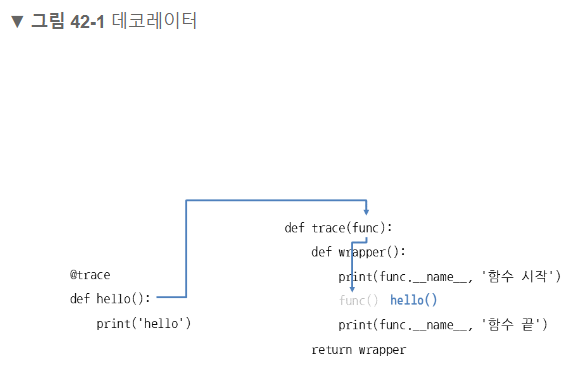

데코레이터는 기존 함수를 수정하지 않으면서 추가 기능을 구현할 때 사용

<참고> 데코레이터를 여러 개 지정하기

함수에는 데코레이터를 여러 개 지정 가능

데코레이터가 실행되는 순서는 위에서 아래 순

@데코레이터 1
@데코레이터 2
 
          def 함수이름():
              코드



In [ ]:
def decorator1(func):
  def wrapper():
    print('decorator1')
    func()
  return wrapper

def decorator2(func):
  def wrapper():
    print('decorator2')
    func()
  return wrapper

  # 데코레이터를 여러 개 지정
@decorator1
@decorator2
def hello():
  print('hello')

hello()

decorator1
decorator2
hello


42.2 매개변수와 반환값을 처리하는 데코레이터 만들기

In [ ]:
def trace(func): # 호출할 함수를 매개변수로 받음
  def wrapper(a,b): # 호출할 함수 add(a,b)의 매개변수와 똑같이 지정
    r = func(a, b) # func에 매개변수 a,b를 넣어서 호출하고 반환값을 변수에 저장
    print('{0}(a={1}, b={2}) → {3}'.format(func.__name__,a,b,r))  # 매개변수와 반환값 출력
    return r # func의 반환값을 반환
  return wrapper # wrapper 함수 반환

@trace # @로 함수 위에 지정해주면 add함수는 그대로 호출됨
def add(a,b):
  return a + b

print(add(10,20))

add(a=10, b=20) → 30
30


- 가변 인수 함수 데코레이터

def add(a, b) : 매개변수의 개수가 고정된 함수

매개변수(인수)가 고정되지 않은 함수는 wrapper 함수를 가변인수함수로 만들면 됨

In [ ]:
def trace(func): # 호출할 함수를 매개변수로 받음
  def wrapper(*args,**kwargs):# 가변 인수 함수로 만듦
    r = func(*args, **kwargs) # func에 args, kwargs를 언패킹하여 넣어줌
    print('{0}(args={1}, kwargs ={2}) →{3}'.format(func.__name__,args,kwargs,r))
    return r
  return wrapper # wrapper 함수 반환

@trace # 위치인수와 키워드 인수를 모두 처리 가능
def get_max(*args): # 따라서 가변인수함수뿐만 아니라 일반적인 함수에도 사용 가능
  return max(args)

@trace
def get_min(**kwargs):
  return min(kwargs.values())

print(get_max(10, 20))
print(get_min(x = 10, y = 20, z = 30))


get_max(args=(10, 20), kwargs ={}) →20
20
get_min(args=(), kwargs ={'x': 10, 'y': 20, 'z': 30}) →10
10


<참고>

메서드에 데코레이터 사용하기

클래스를 만들면서 메서드에 데코레이터를 사용할 때는 self를 주의해야 함

인스턴스 메서드는 항상 self를 받으므로 데코레이터를 만들 때도 wrapper함수의 첫 번째 매개변수는 self로 지정해야함 (클래스 메서드는 cls)

마찬가지로 func를 호출할 때도 self 와 매개변수를 그대로 넣어야 함


In [ ]:
def trace(func):
  def wrapper(self, a, b):
    r = func(self, a, b)
    print('{0}(a = {1}, b = {2} → {3}'.format(func.__name__, a, b, r))
    return r
  return wrapper

class Calc:
  @trace
  def add(self, a, b):
    return a + b

c = Calc()
print(c.add(10,20))

add(a = 10, b = 20 → 30
30


42.3 매개변수가 있는 데코레이터 만들기

- 값을 지정해서 동작을 바꿀 수 있음

In [ ]:
from prompt_toolkit.utils import is_conemu_ansi
def is_multiple(x):# 매개변수가 있는 데코레이터를 만들 때는 함수를 하나 더 생성해야함
  def real_decorator(func): # 실제 데코레이터 역할을 하는 함수
    def wrapper(a,b): # wrapper함수 생성, func의 결과가 데코레이터 매개변수 x의 배수인지 확인
      r = func(a, b) # func를 호출하고 반환값을 변수에 저장
      if r % x == 0: # func의 반환값이 x의 배수인지 확인
        print('{0}의 반환값은 {1}의 배수입니다.'.format(func.__name__,x))
      else:
        print('{0}의 반환값은 {1}의 배수가 아닙니다.'.format(func.__name__,x))
      return r # func의 반환값을 반환
    return wrapper # real_decorator, wrapper함수를 두 개 만들었으므로 함수를 만든 뒤에 
  return real_decorator # return으로 두 함수 반환

@is_multiple(3) # @데코레이터(인수)
def add(a,b):
  return a + b

print(add(10,20))
print(add(2,5))

add의 반환값은 3의 배수입니다.
30
add의 반환값은 3의 배수가 아닙니다.
7


- 데코레이터를 사용할 때
        @데코레이터(인수)
        def 함수이름():
            코드

<참고>

매개변수가 있는 데코레이터를 여러 개 지정하기

매개변수가 있는 데코레이터를 여러 개 지정할 때는 다음과 같인 인수를 넣은 데코레이터를 여러 줄로 지정

      @데코레이터1(인수)
      @데코레이터2(인수)
      def 함수이름():
          코드
        

In [ ]:
@is_multiple(3)
@is_multiple(7)
def add(a,b):
  return a + b
add(10,20)

add의 반환값은 7의 배수가 아닙니다.
wrapper의 반환값은 3의 배수입니다.


30

@을 사용하지 않았을 때는 다음 코드와 동작이 같음

In [ ]:
decorated_add = is_multiple(3)(is_multiple(7)(add))
decorated_add(10,20)

add의 반환값은 7의 배수가 아닙니다.
wrapper의 반환값은 3의 배수입니다.
wrapper의 반환값은 7의 배수가 아닙니다.
wrapper의 반환값은 3의 배수입니다.


30

<참고>

원래 함수 이름이 안나온다면?

데코레이터를 여러 개 사용하면 데코레이터에서 반환된 wrapper함수가 다른 데코레이터로 들어감

따라서 함수의 __name__을 출력해보면 wrapper가 나옴

함수의 원래 이름을 출력하고 싶다면 ?

→ functools 모듈의 wraps 데코레이터 사용

In [ ]:
import functools

def is_multiple(x):
  def real_decorator(func):
    @functools.wraps(func)
    def wrapper(a,b):
      r = func(a,b)
      if r % x == 0 :
        print('{0}의 반환값은 {1}의 배수입니다.'.format(func.__name__, x))
      else:
        print('{0}의 반환값은 {1}의 배수가 아닙니다.'.format(func.__name__, x))
      return r
    return wrapper
  return real_decorator

@is_multiple(3)
@is_multiple(7)
def add(a,b):
  return a + b

add(10,20)

add의 반환값은 7의 배수가 아닙니다.
add의 반환값은 3의 배수입니다.


30

42.4 클래스로 데코레이터 만들기

클래스를 활용할 때는 인스턴스를 함수처럼 호출하게 해주는  __call__ 메서드를 구현해야 함

In [ ]:
class Trace:
  def __init__(self,func): # 호출할 함수를 인스턴스의 초깃값으로 받음
    self.func = func # 호출할 함수를 속성 func에 저장
  
  def __call__(self): # __name__으로 함수 이름 출력
    print(self.func.__name__,'함수 사용') # 속성 func에 저장된 함수를 호출
    self.func()
    print(self.func.__name__, '함수 끝')

@Trace # @ 데코리에터
def hello():
  print('hello')
hello() # 함수를 그대로 호출

hello 함수 사용
hello
hello 함수 끝


          @데코레이터
          def  함수이름():
            코드

<참고>

클래스로 만든 데코레이터는 @를 지정하지 않고, 데코레이터의 반환값을 호출하는 방식으로도 사용 가능

데코레이터에 호출할 함수를 넣어서 인스턴스를 생성한 뒤 인스턴스를 호출해주면 됨

즉, 클래스에 __call__메서드를 정의했으므로 함수처럼 ()괄호를 붙여서 호출할 수 있음

In [ ]:
def hello(): # @데코레이터를 지정하지 않음
  print('hello')

trace_hello = Trace(hello) # 데코레이터에 호출할 함수를 넣어서 인스턴스 생성
trace_hello # 인스턴스를 호출, __call__ 메서드가 호출됨

42.5 클래스로 매개변수와 반환값을 처리하는 데코레이터 만들기

클래스로 만든 데코레이터도 매개변수와 반환값 처리 가능

다음은 함수의 매개변수를 출력하는 데코레이터 
↓↓↓↓↓↓↓↓↓

In [ ]:
class Trace:
    def __init__(self, func):    # 호출할 함수를 인스턴스의 초깃값으로 받음
        self.func = func         # 호출할 함수를 속성 func에 저장
 
    def __call__(self, *args, **kwargs):    # 호출할 함수의 매개변수를 처리
        r = self.func(*args, **kwargs) # self.func에 매개변수를 넣어서 호출하고 반환값을 변수에 저장
        print('{0}(args={1}, kwargs={2}) -> {3}'.format(self.func.__name__, args, kwargs, r))
                                            # 매개변수와 반환값 출력
        return r                            # self.func의 반환값을 반환
 
@Trace    # @데코레이터
def add(a, b):
    return a + b
 
print(add(10, 20))
print(add(a=10, b=20))

add(args=(10, 20), kwargs={}) -> 30
30
add(args=(), kwargs={'a': 10, 'b': 20}) -> 30
30


In [ ]:
class IsMultiple:
    def __init__(self, x):         # 데코레이터가 사용할 매개변수를 초깃값으로 받음
        self.x = x                 # 매개변수를 속성 x에 저장
 
    def __call__(self, func):      # 호출할 함수를 매개변수로 받음
        def wrapper(a, b):         # 호출할 함수의 매개변수와 똑같이 지정(가변 인수로 작성해도 됨)
            r = func(a, b)         # func를 호출하고 반환값을 변수에 저장
            if r % self.x == 0:    # func의 반환값이 self.x의 배수인지 확인
                print('{0}의 반환값은 {1}의 배수입니다.'.format(func.__name__, self.x))
            else:
                print('{0}의 반환값은 {1}의 배수가 아닙니다.'.format(func.__name__, self.x))
            return r               # func의 반환값을 반환
        return wrapper             # wrapper 함수 반환
 
@IsMultiple(3)    # 데코레이터(인수)
def add(a, b):
    return a + b
 
print(add(10, 20))
print(add(2, 5))

add의 반환값은 3의 배수입니다.
30
add의 반환값은 3의 배수가 아닙니다.
7


데코레이터를 사용할 때

          @데코레이터(인수)
          def 함수이름():
              코드

In [ ]:
def type_check(type_a, type_b):
    def real_decorator(func):
        def wrapper(a, b):
            if isinstance(a, type_a) and isinstance(b, type_b):
                return func(a, b)
            else:
                raise RuntimeError('자료형이 올바르지 않습니다.')
        return wrapper
    return real_decorator

@type_check(int, int)
def add(a, b):
    return a + b
 
print(add(10, 20))
print(add('hello', 'world'))

30


RuntimeError: ignored

연습문제)

표준 입력으로 HTML 태그 이름 두 개가 입력됩니다. 다음 소스 코드에서 함수의 반환값을 HTML 태그로 감싸는 데코레이터를 만드세요. HTML 태그는 웹 페이지에 사용하는 문법이며 <span>문자열</span>, <p>문자열</p>처럼 <태그이름>으로 시작하며 </태그이름>으로 끝납니다.

In [ ]:
def html_tag(tag_name): # 데코레이터가 사용할 매개변수 지정
  def real_decorator(func): # 실제 데코레이터 역할을 하는 real_decorator 만듦
    def wrapper():
     return ('<{0}>{1}</{0}>'. format(tag_name,func()))
    return wrapper
  return real_decorator

a, b = input().split()
 
@html_tag(a)
@html_tag(b)
def hello():
    return 'Hello, world!'
 
print(hello())

p span
<p><span>Hello, world!</span></p>


## **Unit 43 정규표현식 사용하기**


정규표현식 : 일정한 규칙을 가진 문자열을 표현하는 방법

- 복잡한 문자열 속에서 특정한 규칙으로 된 문자열을 검색한 뒤 추출하거나 바꿀 때 사용

- 문자열이 정해진 규칙에 맞는 지 판단할 때도 사용

43.1 문자열 판단하기

정규표현식은 re모듈을 가져와서 사용하며 match함수에 정규표현식 패턴과 판단할 문자열을 넣는다.

        re.match('패턴','문자열')

In [3]:
import re
re.match('Hello','Hello, world!') # 문자열이 있으므로 정규표현식 매치 객체가 반환됨

<re.Match object; span=(0, 5), match='Hello'>

In [4]:
re.match('Python', 'Hello,world!') # 문자열이 없으므로 아무것도 반환되지 않음

In [5]:
'Hello, world!'.find('Hello')

0

- 문자열이 맨 앞에 오는지 맨 뒤에 오는지 판단하기

정규표현식 

: 특정 문자열이 맨 앞에 오는지 맨 뒤에 오는지 판단 가능

: 문자열 앞에 ^ : 맨 앞에 오는지 판단

: 문자열 뒤에$ : 맨 뒤에 오는지 판단

단, match 대신 search함수를 사용해야 함

match함수는 문자열 처음부터 매칭되는지 판단하지만, search는 문자열 일부분이 매칭되는지 판단

      re.search('패턴','문자열')

^Hello'는 'Hello, world!'가 'Hello'로 시작하는지 판단하고, 

'world!$'는 'Hello, world!'가 'world!'로 끝나는지 판단합니다.

In [6]:
re.search('^Hello','Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [7]:
re.search('world!$','Hello, world!')

<re.Match object; span=(7, 13), match='world!'>

- 지정된 문자열이 하나라도 포함되는지 판단하기

| : 특정 문자열에서 지정된 문자열(문자)이 하나라도 포함되는지 판단

      - 문자열|문자열
      - 문자열|문자열|문자열|문자열

In [8]:
re.match('hello|world','hello')

<re.Match object; span=(0, 5), match='hello'>

43.2 범위 판단하기

[ 대괄호 ] 안에 숫자 범위를 넣으며 * 또는 +를 붙임

→ 숫자 범위는 0-9처럼 표현하며 *는 문자(숫자)가 0개 이상 있는지, +는 1개 이상 있는지 판단

    [0-9]*
    [0-9]+

In [9]:
re.match('[0-9]*', '1234')    # 1234는 0부터 9까지 숫자가 0개 이상 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 4), match='1234'>

In [10]:
re.match('[0-9]+', '1234')    # 1234는 0부터 9까지 숫자가 1개 이상 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 4), match='1234'>

In [11]:
re.match('[0-9]+', 'abcd')    # abcd는 0부터 9까지 숫자가 1개 이상 없으므로 패턴에 매칭되지 않음

In [12]:
re.match('a*b', 'b')      # b에는 a가 0개 이상 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 1), match='b'>

In [13]:
re.match('a+b', 'b')      # b에는 a가 1개 이상 없으므로 패턴에 매칭되지 않음

In [14]:
re.match('a*b', 'aab')    # aab에는 a가 0개 이상 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 3), match='aab'>

In [15]:
re.match('a+b', 'aab')    # aab에는 a가 1개 이상 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 3), match='aab'>

- 문자가 한 개만 있는지 판단하기

? : ? 앞의 문자가 0개 또는 1개 인지 판단

. : .이 있는 위치에 아무 문자(숫자)가 1개 있는지 판단

      문자?
      [0-9]?
      .

In [16]:
re.match('abc?d', 'abd')         # abd에서 c 위치에 c가 0개 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 3), match='abd'>

In [17]:
re.match('ab[0-9]?c', 'ab3c')    # [0-9] 위치에 숫자가 1개 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 4), match='ab3c'>

In [18]:
re.match('ab.d', 'abxd')         # .이 있는 위치에 문자가 1개 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 4), match='abxd'>

- 문자 개수 판단하기

      문자{개수}
      (문자열){개수}

In [19]:
re.match('h{3}', 'hhhello') # h가 3개 있는지 판단

<re.Match object; span=(0, 3), match='hhh'>

In [20]:
re.match('(hello){3}', 'hellohellohelloworld') # hello가 3개 있는지 판단

<re.Match object; span=(0, 15), match='hellohellohello'>

- 특정 범위의 문자(숫자)가 몇 개있는지 판단

      [0-9]{개수}

In [21]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}', '010-1000-1000')    # 숫자 3개-4개-4개 패턴에 매칭됨

<re.Match object; span=(0, 13), match='010-1000-1000'>

In [22]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}', '010-1000-100')   # 숫자 3개-4개-4개 패턴에 매칭되지 않음

- 문자(숫자)의 개수 범위 지정

      (문자){시작개수, 끝 개수}
      (문자열){시작개수, 끝 개수}
      [0-9]{시작개수, 끝 개수}

In [23]:
re.match('[0-9]{2,3}-[0-9]{3,4}-[0-9]{4}', '02-100-1000')    # 2~3개-3~4개-4개 패턴에 매칭됨

<re.Match object; span=(0, 11), match='02-100-1000'>

- 숫자와 영문문자를 조합해서 판단하기

      a-z
      A-Z

In [24]:
re.match('[a-zA-Z0-9]+', 'Hello1234')    # a부터 z, A부터 Z, 0부터 9까지 1개 이상 있으므로

<re.Match object; span=(0, 9), match='Hello1234'>

- 한글 판단하기

      가-힣

In [25]:
re.match('[가-힣]+', '홍길동')    # 가부터 힣까지 1개 이상 있으므로 패턴에 매칭됨

<re.Match object; span=(0, 3), match='홍길동'>

- 특정 문자 범위에 포함되지 않는지 판단

      [^범위]*
      [^범위]+

In [26]:
re.match('[^A-Z]+', 'Hello')    # 대문자를 제외. 대문자가 있으므로 패턴에 매칭되지 않음

In [27]:
re.match('[^A-Z]+', 'hello')    # 대문자를 제외. 대문자가 없으므로 패턴에 매칭됨

<re.Match object; span=(0, 5), match='hello'>

- 특정 문자 범위로 시작할 때

      ^[범위]*
      ^[범위]+

In [28]:
re.search('^[A-Z]+', 'Hello')        # 대문자로 시작하므로 패턴에 매칭됨

<re.Match object; span=(0, 1), match='H'>

- 특정 문자(숫자) 범위로 끝나는지 확인

          [범위]*$
          [범위]+$


In [29]:
re.search('[0-9]+$', 'Hello1234')    # 숫자로 끝나므로 패턴에 매칭됨

<re.Match object; span=(5, 9), match='1234'>

- 특수 문자 판단하기
        \특수문자

In [30]:
re.search('\*+', '1 ** 2')                    # *이 들어있는지 판단

<re.Match object; span=(2, 4), match='**'>

In [31]:
re.match('[$()a-zA-Z0-9]+', '$(document)')    # $, (, )와 문자, 숫자가 들어있는지 판단

<re.Match object; span=(0, 11), match='$(document)'>

            \d: [0-9]와 같음. 모든 숫자
            \D: [^0-9]와 같음. 숫자를 제외한 모든 문자
            \w: [a-zA-Z0-9_]와 같음. 영문 대소문자, 숫자, 밑줄 문자
            \W: [^a-zA-Z0-9_]와 같음. 영문 대소문자, 숫자, 밑줄 문자를 제외한 모든 문자

- 공백 처리하기

              \s: [ \t\n\r\f\v]와 같음. 공백(스페이스), \t(탭) \n(새 줄, 라인 피드), \r(캐리지 리턴), \f(폼피드), \v(수직 탭)을 포함
              \S: [^ \t\n\r\f\v]와 같음. 공백을 제외하고 \t, \n, \r, \f, \v만 포함

In [32]:
re.match('[a-zA-Z0-9 ]+', 'Hello 1234')     # ' '로 공백 표현

<re.Match object; span=(0, 10), match='Hello 1234'>

In [33]:
re.match('[a-zA-Z0-9\s]+', 'Hello 1234')    # \s로 공백 표현

<re.Match object; span=(0, 10), match='Hello 1234'>

<참고> 같은 정규표현식 패턴을 자주 사용할 때

              객체 = re.compile('패턴')
              객체.match('문자열')
              객체.search('문자열')

In [34]:
p = re.compile('[0-9]+')    # 정규표현식 패턴을 객체로 만듦
p.match('1234')             # 정규표현식 패턴 객체에서 match 메서드 사용
p.search('hello')           # 정규표현식 패턴 객체에서 search 메서드 사용

43.3 그룹 사용하기

정규표현식 그룹

- 해당 그룹과 일치하는 문자열을 얻어올 때 사용
- 패턴 안에서 정규표현식을 (괄호)로 묶으면 그룹이 됨

      (정규표현식)(정규표현식)

공백으로 구분된 숫자를 두 그룹으로 나누어서 찾은 뒤 각 그룹에 해당하는 문자열(숫자)을 가져옴

      매치객체.group(그룹숫자)

In [35]:
m = re.match('([0-9]+) ([0-9]+)', '10 295')
m.group(1)    # 첫 번째 그룹(그룹 1)에 매칭된 문자열을 반환

'10'

In [36]:
m.group(2)

'295'

In [38]:
m.group(0) # 매칭된 문자열을 한꺼번에 반환 

'10 295'

매치 객체의 group메서드에 숫자를 지정하면 해당 그룹에 매칭된 문자열을 반환

숫자를 지정하지 않거나 0을 지정하면 매칭된 문자열을 한꺼번에 반환

groups 메서드는 각 그룹에 해당하는 문자열을 튜플로 반환

        매치객체.groups

In [37]:
m.group() # 매칭된 문자열을 한꺼번에 반환 

'10 295'

그룹의 개수가 많아지면 구분하기 힘듦

▶ 그룹의 이름 지으면 편리

      (?P< 이름>정규표현식)

      매치객체.group('그룹이름')

In [42]:
m = re.match('(?P<func>[a-zA-Z_][a-zA-Z0-9_]+)\((?P<arg>\w+)\)','print(1234)')
m.group('func') # 그룹 이름으로 매칭된 문자열 출력

'print'

In [43]:
m.group('arg') # 그룹 이름으로 매칭된 문자열 출력

'1234'

- 패턴에 매칭되는 모든 문자열 가져오기

findall 함수를 사용하며 매칭된 문자열을 리스트로 반환

      re.findall('패턴','문자열')

In [44]:
re.findall('[0-9]+','1 2 Fizz 4 Buzz Fizz 7 8')

['1', '2', '4', '7', '8']

<참고>

*, +와 그룹 활용하기 

정규표현식에서 +과 *을 조합하여 사용할 때는 그룹으로 묶어서 사용

(.[a-z]+)*는 점과 영문 소문자가 1개 이상 있는지 판단하고, 이것 자체가 0개 이상인지 판단

즉, 규칙은 반드시 지켜야 하지만 있어도 되고 없어도 되는 상황에 사용

In [45]:
re.match('[a-z]+(.[a-z]+)*$','hello.world') # .world는 문자열이므로 패턴에 매칭됨

<re.Match object; span=(0, 11), match='hello.world'>

In [46]:
re.match('[a-z]+(.[a-z]+)*$', 'hello.1234') # .1234는 숫자이므로 패턴에 매칭되지 않음

In [48]:
re.match('[a-z]+(.[a-z]+)*$', 'hello')

<re.Match object; span=(0, 5), match='hello'>

43.4 문자열 바꾸기

정규표현식으로 특정 문자열을 찾은 뒤 다른 문자열을 바꾸는 방법

- 문자열을 바꿀 때는 sub함수를 사용
- 바꿀 문자열, 문자열, 바꿀 횟수를 넣어줌
 
※ 바꿀 횟수를 넣으면 지정된 횟수만큼 바꾸며 바꿀 횟수를 생략하면 찾은 문자열을 모두 바꿈

      re.sub('패턴','바꿀문자열','문자열',바꿀횟수)

In [51]:
re.sub('apple|orange','fruit','apple box orange tree') # apple 또는 orange를 fruit로 바꿈

'fruit box fruit tree'

- 숫자만 찾아서 'n'으로 바꿈

In [52]:
re.sub('[0-9]+', 'n', '1 2 Fizz 4 Buzz Fizz 7 8') # 숫자만 찾아서 n으로 바꿈

'n n Fizz n Buzz Fizz n n'

- sub 함수는 바꿀 문자열 대신 교체 함수를 지정할 수 있음

교체 함수는 매개변수로 매치 객체를 받으며 바꿀 결과를 문자열로 반환하면 됨

        교체함수(매치객체)
        re.sub('패턴', 교체함수, '문자열', 바꿀횟수)

In [53]:
def multiple10(m): # 매개변수로 매치 객체를 받음
  n = int(m.group()) # 매칭된 문자열을 가져와서 정수로 변환
  return str(n*10) # 숫자에 10을 곱한 뒤 문자여려로 변환해서 반환

re.sub('[0-9]+', multiple10, '1 2 Fizz 4 Buzz Fizz 7 8')

'10 20 Fizz 40 Buzz Fizz 70 80'

In [54]:
re.sub('[0-9]+', lambda m : str(int(m.group()) * 10), '1 2 Fizz 4 Buzz Fizz 7 8')

'10 20 Fizz 40 Buzz Fizz 70 80'

- 찾은 문자열을 결과에 다시 사용하기

정규표현식을 그룹으로 묶음 → 바꿀 문자열에서 \\숫자 형식으로 매칭된 문자열을 가져와서 사용

In [56]:
re.sub('([a-z]+) ([0-9]+)', '\\2 \\1 \\2 \\1', 'hello 1234') # 그룹 2, 1, 2, 1 순으로 바꿈

'1234 hello 1234 hello'

In [60]:
re.sub('({\s*)"(\w+)":\s*"(\w+)"(\s*})', '<\\2>\\3</\\2>', '{ "name": "james" }')

'<name>james</name>'

- 맨 처음 ({\s*) : {와 공백을 찾으므로 '{ '을 찾고
- 마지막 (\s*}) : 공백과 }를 찾으므로 ' }'를 찾음
- 중간에 있는 "(\w+)":\s*"(\w+)"은 :을 기준으로 양 옆의 name과 james를 찾음
- 바꿀 문자열은 '<\\2>'과 같이 그룹 2 name과 그룹 3 james만 사용하고 그룹 1 '{ ', 그룹 4 '} '는 버림

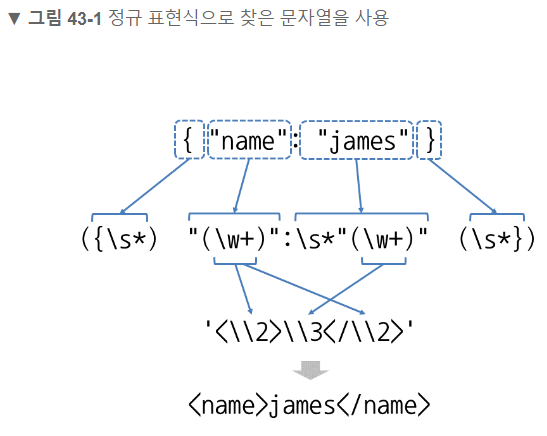

만약 그룹에 이름을 지었다면

\\g<이름> 형식으로 매칭된 문자열을 가져올 수 있음

(\\g<숫자> 형식으로 숫자를 지정해도 됨)

        \\g<이름>
        \\g<숫자>

In [61]:
re.sub('({\s*)"(?P<key>\w+)":\s*"(?P<value>\w+)"(\s*})', '<\\g<key>>\\g<value></\\g<key>>', '{ "name": "james" }')
'<name>james</name>'

'<name>james</name>'

<참고>

raw문자열 사용하기

정규표현식의 특수 문자를 판단하려면 \을 붙여야 함

문자열 앞에 r을 붙여주면 원시(raw) 문자열이 되어 \를 붙이지 않아도 특수 문자를 그대로 판단할 수 있음

따라서 raw 문자열에서는 \\숫자, \\g<이름>, \\g<숫자>는 \숫자, \g<이름>, \g<숫자> 형식처럼 \를 하나만 붙여서 사용할 수 있음

      r'\숫자 \g<이름> \g<숫자>'

In [63]:
re.sub('({\s*)"(\w+)":\s*"(\w+)"(\s*})', r'<\2>\3</\2>', '{ "name": "jamge" }')

'<name>jamge</name>'

연습문제)

표준 입력으로 URL 문자열이 입력 입력됩니다. 입력된 URL이 올바르면 True, 잘못되었으면 False를 출력하는 프로그램을 만드세요. 이 심사문제에서 판단해야 할 URL의 규칙은 다음과 같습니다.

- http:// 또는 https://로 시작
- 도메인은 도메인.최상위도메인 형식이며 영문  대소문자, 숫자, -로 되어 있어야 함
- 도메인 이하 경로는 /로 구분하고, 영문 대소문자, 숫자, -, _, ., ?, =을 사용함

In [69]:
url = input()

result = False
if re.match('^(https://|http://)[a-zA-Z0-9-\.]+\.([a-zA-Z0-9]+)(/)*[a-zA-Z0-9-=_,\./]*',url):
  result = True
else:
  result = False

print(result)

http://www.example.com/hello/world.do?key=python
True
